In [1]:
import cv2
import os
import numpy as np
from keras.utils import np_utils

Using TensorFlow backend.


## Collecting data:

In [2]:
cascade_classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [3]:
cap = cv2.VideoCapture(0)
name = input('Enter with mask or without mask')
entry = input('Entry no:')
i = 0
count = 0
while i != 100:
    tval,ss = cap.read()
    if tval==False:
        continue
    else:
        count+=1
        gray = cv2.cvtColor(ss,cv2.COLOR_BGR2GRAY)
        faces = cascade_classifier.detectMultiScale(gray,1.1,4)
        cv2.imshow(name,ss)
        cv2.waitKey(1)
        if len(faces)==0:
            continue
        for (x,y,w,h) in faces:
            x1 = x
            y1 = y
            x2 = x+w
            y2 = y+h
            #cv2.rectangle(ss,(x1,y1),(x2,y2),(0,0,255),2)
            face = ss
        cv2.imshow(name,ss)
        cv2.waitKey(1)
        #face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        #face = cv2.resize(face,(100,100))
        if count%6 == 0:
            cv2.imwrite(os.path.join('C:/Users/ABCD/Mask_data/'+name+'/'+entry+str(i)+'.jpg'),face)
            i+=1
            print(i)
cap.release()
cv2.destroyAllWindows()
print('All the photos are saved.')

Enter with mask or without maskwithout mask
Entry no:23
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
All the photos are saved.


In [4]:
data_path='C:/Users/ABCD/Mask_data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)

{'with mask': 0, 'without mask': 1}


In [5]:
img_size=160
data=[]
target=[]
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)  
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = cascade_classifier.detectMultiScale(gray,1.1,4)
        if len(faces)==0:
            continue
        for (x,y,w,h) in faces:
            x1 = x
            y1 = y
            x2 = x+w
            y2 = y+h
            #cv2.rectangle(ss,(x1,y1),(x2,y2),(0,0,255),2)
            face = img[y1:y2,x1:x2]
            face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
            face = cv2.resize(face,(160,160))
            data.append(face)
            target.append(label_dict[category])

In [6]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
new_target=np_utils.to_categorical(target)
print(data.shape)
print(new_target.shape)

(1142, 160, 160, 1)
(1142, 2)


In [7]:
np.save('data',data)
np.save('target',new_target)
# Saving data.npy and target.npy

In [8]:
# Loading data.npy and target.npy
data=np.load('data.npy')
target=np.load('target.npy')

# Building the model:

In [9]:
# CNN architecture
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),strides=(1,1),activation = 'relu',input_shape=data.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(64,(3,3),strides=(1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),strides=(1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 158, 158, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 77, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [14]:
import matplotlib.pyplot as plt

[0. 1.]
(160, 160, 1)


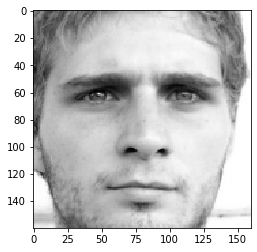

In [15]:
n = 8
print(train_target[n])
print(train_data[n].shape)
sample = train_data[n].reshape((160,160))
plt.imshow(sample,cmap='gray')

In [16]:
history=model.fit(train_data,train_target,epochs=8,validation_split=0.2)

Train on 821 samples, validate on 206 samples
Epoch 1/8
821/821 [==============================] - 31s 37ms/step - loss: 0.6165 - accuracy: 0.7077 - val_loss: 0.4135 - val_accuracy: 0.8010
Epoch 2/8
821/821 [==============================] - 29s 36ms/step - loss: 0.3511 - accuracy: 0.8867 - val_loss: 0.1319 - val_accuracy: 0.9466
Epoch 3/8
821/821 [==============================] - 30s 36ms/step - loss: 0.2281 - accuracy: 0.9184 - val_loss: 0.1272 - val_accuracy: 0.9515
Epoch 4/8
821/821 [==============================] - 32s 39ms/step - loss: 0.1411 - accuracy: 0.9501 - val_loss: 0.1274 - val_accuracy: 0.9757
Epoch 5/8
821/821 [==============================] - 29s 35ms/step - loss: 0.1144 - accuracy: 0.9537 - val_loss: 0.1203 - val_accuracy: 0.9515
Epoch 6/8
821/821 [==============================] - 29s 35ms/step - loss: 0.1014 - accuracy: 0.9610 - val_loss: 0.1530 - val_accuracy: 0.9757
Epoch 7/8
821/821 [==============================] - 29s 36ms/step - loss: 0.0798 - accuracy: 0.

In [17]:
from matplotlib import pyplot as plt

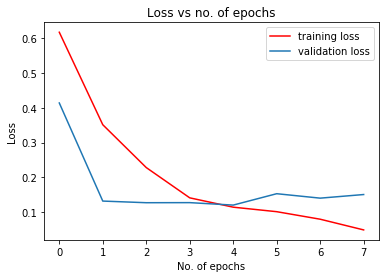

In [18]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('Loss vs no. of epochs')
plt.legend()
plt.show()

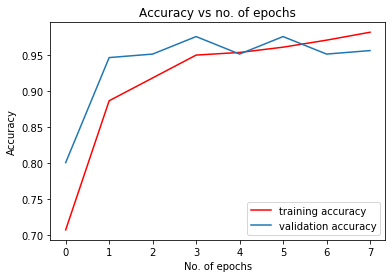

In [19]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs no. of epochs')
plt.legend()
plt.show()

In [20]:
# Testing the model:
score = model.evaluate(test_data,test_target)
print('Test Accuracy percentage:')
print(score[1]*100)

115/115 [==============================] - 1s 12ms/step
Test Accuracy percentage:
93.04347634315491


In [21]:
cascade_classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [22]:
cap = cv2.VideoCapture(0)
while True:
    tval,ss = cap.read()
    if tval==False:
        continue
    gray = cv2.cvtColor(ss,cv2.COLOR_BGR2GRAY)
    faces = cascade_classifier.detectMultiScale(gray,1.1,4)
    cv2.imshow('Image',ss)
    cv2.waitKey(1)
    if len(faces) == 0:
        continue
    for (x,y,w,h) in faces:
        x1 = x
        y1 = y
        x2 = x+w
        y2 = y+h
        cv2.rectangle(ss,(x1,y1),(x2,y2),(0,0,255),2)
        face = ss[y1:y2,x1:x2]
    cv2.imshow('Image',ss)
    cv2.waitKey(100)
    captured_image = face
    break
cap.release()
cv2.destroyAllWindows()

(145, 145, 3)


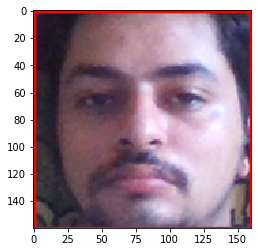

In [23]:
print(captured_image.shape)
captured_image = cv2.cvtColor(captured_image,cv2.COLOR_BGR2RGB)
captured_image = cv2.resize(captured_image,(160,160))
plt.imshow(captured_image)
plt.show()

(160, 160)


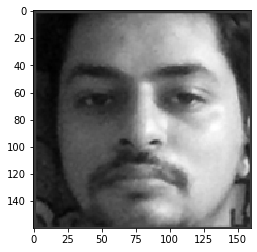

In [24]:
captured_image = cv2.cvtColor(captured_image,cv2.COLOR_RGB2GRAY)
captured_image = captured_image/255.0
print(captured_image.shape)
plt.imshow(captured_image,cmap='gray')
plt.show()

In [25]:
captured_image = captured_image.reshape((1,160,160,1))

In [26]:
class2label = {1:'without mask',0:'with mask'}

In [27]:
ans = model.predict_classes(captured_image)
print(class2label[ans[0]])

without mask


# Mask Detection in Real Time:

In [28]:
cap = cv2.VideoCapture(0)
while True:
    tval,ss = cap.read()
    if tval==False:
        continue
    else:
        gray = cv2.cvtColor(ss,cv2.COLOR_BGR2GRAY)
        faces = cascade_classifier.detectMultiScale(gray,1.1,4)
        if len(faces) == 0:
            cv2.imshow('Image',ss)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
            continue
        for (x,y,w,h) in faces:
            x1 = x
            y1 = y
            x2 = x+w
            y2 = y+h
            cv2.rectangle(ss,(x1,y1),(x2,y2),(255,255,255),2)
            face = ss[y1:y2,x1:x2]
            cpimg = ss
            cpimg = cv2.cvtColor(cpimg,cv2.COLOR_BGR2GRAY)
            cpimg = cv2.resize(cpimg,(160,160))
            cpimg = cpimg.reshape((1,160,160,1))
            cap_img = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
            cap_img = cv2.resize(cap_img,(160,160))
            cap_img = cap_img.reshape((1,160,160,1))
            ans = model.predict_classes(cap_img)
            printed = class2label[ans[0]]
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(ss,printed,(x1-1,y1-1), font, .5,(0,0,250),2,cv2.LINE_AA)
        cv2.imshow('Image',ss)
        if cv2.waitKey(1) & 0xFF == ord('w'):
            break
cap.release()
cv2.destroyAllWindows()

In [220]:
##########################################################################